#지도학습

In [1]:
#Regression 선형회귀

import numpy as np
import pandas as pd
import sklearn #싸이키런
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #쓸대없는 경고 무시

In [2]:
from sklearn.datasets import load_boston #보스턴 집 값
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

In [7]:
#Simple Linear Regression
from sklearn.model_selection import train_test_split #학습용, 테스트용 자르기
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) # X값은 대문자 쓰는게 관행

In [8]:
X_train['RM'].values.reshape(-1,1)[:5] #1차원 2차원값으로 변경, -1이면 맨 끝 값 표현 됨, 5개정도만 본다

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [9]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [10]:
sim_lr.fit(X_train['RM'].values.reshape((-1,1)),y_train) #트레이닝(데이터,결과 값) 학습

LinearRegression()

In [11]:
y_pred = sim_lr.predict(X_test['RM'].values.reshape((-1,1))) #테스트 값 예측

In [12]:
# 결과 살펴보기
from sklearn.metrics import r2_score # R2계산
print('단순 선형 회귀, R2값: {:.4f}'.format(r2_score(y_test, y_pred))) # :전체에서 4f 소숫점 4자리까지 표현


단순 선형 회귀, R2값: 0.2121


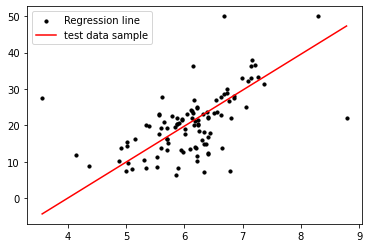

In [13]:
#결과 시각화 하기
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']),10) #방의 갯 수 최소 값,최대 값,좌표
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')#그래프에 찍어보기
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'test data sample',],  loc='upper left')

In [14]:
#Multiple Linear Regression 여러값으로 집값 계산
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred =mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀, R2값 : {:.4f}'.format(r2_score(y_test,y_pred))) #R2 방식은 결과 값 잘 안나옴

다중 선형 회귀, R2값 : 0.6226


In [17]:
# Decition Tree Regressor
from sklearn.tree import DecisionTreeRegressor #트리 알고리즘
dt_regr = DecisionTreeRegressor(max_depth=6) # max_depth 나무 뿌리가 몇 단계까지 내려 갈 것인가

In [18]:
dt_regr.fit(X_train['RM'].values.reshape(-1,1),y_train) # 학습

DecisionTreeRegressor(max_depth=6)

In [19]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [20]:
print('단순 결정 트리 회귀 R2 : {:.4f}'.format(r2_score(y_test, y_pred))) # 학습을 많이하면 오히려 테스트용과 차이가 많이 나올 수 있다

단순 결정 트리 회귀 R2 : 0.3474


In [21]:
arr = np.arange(1,11)
print(arr)

[ 1  2  3  4  5  6  7  8  9 10]


In [22]:
best_depth = 0 #최고 값 넘버
best_r2 = 0 # 최고 값

for depth in arr: #10번 반복문
    dt_regr = DecisionTreeRegressor(max_depth=depth)
    dt_regr.fit(X_train['RM'].values.reshape(-1,1),y_train) #방의 갯수 값으로 학습
    y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1)) #예측

    temp_r2 = r2_score(y_test, y_pred)#예측 껼과
    print('단순 결정 트리 회귀 depth = {} R2 : {:.4f}'.format(depth, temp_r2)) #결과 프린트
    
    if best_r2 < temp_r2: #반복하는 동안 최고값 변수에 저장
        best_depth = depth
        best_r2 = temp_r2
print('최적의 결과는 depth = {} R2 = {:.4f}'.format(best_depth, best_r2)) #최고 효율 값 변수 프린트

단순 결정 트리 회귀 depth = 1 R2 : 0.2459
단순 결정 트리 회귀 depth = 2 R2 : 0.3547
단순 결정 트리 회귀 depth = 3 R2 : 0.3931
단순 결정 트리 회귀 depth = 4 R2 : 0.3816
단순 결정 트리 회귀 depth = 5 R2 : 0.3247
단순 결정 트리 회귀 depth = 6 R2 : 0.3474
단순 결정 트리 회귀 depth = 7 R2 : 0.3164
단순 결정 트리 회귀 depth = 8 R2 : 0.3368
단순 결정 트리 회귀 depth = 9 R2 : 0.3098
단순 결정 트리 회귀 depth = 10 R2 : 0.2579
최적의 결과는 depth = 3 R2 = 0.3931


In [23]:
best_i = 0
best_r2 = 0

for i in arr: #10번 반복문
    dt_regr = DecisionTreeRegressor(max_depth=i) #트리 각숫자만큼 반복
    dt_regr.fit(X_train, y_train) # 여러 데이터로 학습
    y_pred = dt_regr.predict(X_test) # 예측
    temp_r2 = r2_score(y_test, y_pred) #예측 정답 비교 값

    print('다중 결정 트리 {}번 R2 : {:.4f}'.format(i, temp_r2)) #결과 값 프린트
    
    if best_r2 < temp_r2: # 결과값 최대 값 걱 변수에 저장
        best_i = i
        best_r2 = temp_r2

print('\n다중 결정 트리 best {}번 R2 : {:.4f}'.format(best_i, best_r2))# 최고 값 프린트

다중 결정 트리 1번 R2 : 0.2459
다중 결정 트리 2번 R2 : 0.5316
다중 결정 트리 3번 R2 : 0.6575
다중 결정 트리 4번 R2 : 0.6835
다중 결정 트리 5번 R2 : 0.6888
다중 결정 트리 6번 R2 : 0.7214
다중 결정 트리 7번 R2 : 0.7501
다중 결정 트리 8번 R2 : 0.7320
다중 결정 트리 9번 R2 : 0.7253
다중 결정 트리 10번 R2 : 0.7335

다중 결정 트리 best 7번 R2 : 0.7501


In [24]:
#Support Vector Machine Regressor
from sklearn.svm import SVR #알고리즘
svm_regr = SVR(C=1)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train) #학습
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1)) #예측

print('단순 서포트 백터 머신 회귀 R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 백터 머신 회귀 R2 : 0.3763


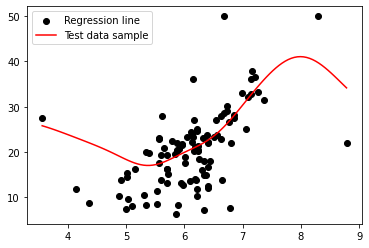

In [25]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

In [26]:


svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train) #학습
y_pred = svm_regr.predict(X_test) #예측
print('e다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))
#최적의 c값 찾아보기

e다중 서포트 벡터 머신 회귀, R2 : 0.4234


In [31]:
arr = np.arange(1,32)
arr

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28

In [30]:
best_c = 0
best_r2 = 0

for i in arr:
    svm_regr = SVR(C=i)
    svm_regr.fit(X_train, y_train) #학습
    y_pred = svm_regr.predict(X_test) #예측
    temp_r2 = r2_score(y_test, y_pred) # 결과
    # print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(temp_r2))

    #최적의 c값 찾아보기
    if best_r2 < temp_r2:
        best_c = i
        best_r2 = temp_r2
print('다중 서포트 벡터 머신 회귀, best {}번 ,R2 : {:.2f}'.format(i, temp_r2*100),'%')

다중 서포트 벡터 머신 회귀, best 31번 ,R2 : 45.70 %


In [38]:
#Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor #뉴럴넷트워크 체험정도...
mlp_regr = MLPRegressor(solver='adam',hidden_layer_sizes=300,max_iter=200) #파라메타 지원, 문제 해결 방법 MLP solver(lbfgs, sgd, adam), 뉴럴 사이즈


mlp_regr.fit(X_train, y_train) #학습
y_pred = mlp_regr.predict(X_test) #예측
temp_r2 = r2_score(y_test, y_pred) #비교 결과

print('다중 MLP 회귀, R2: {:.4f}'.format(temp_r2))

다중 MLP 회귀, R2: 0.4915
